## 卷積神經網路

In [1]:
! nvidia-smi

Mon May 11 06:42:30 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf

In [0]:
mnist = tf.keras.datasets.mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
x_train.shape
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)


In [0]:
model = tf.keras.models.Sequential()

# 1. Convolution
model.add(tf.keras.layers.Conv2D(filters=16, 
                                      kernel_size=(3, 3), 
                                      padding = 'same', 
                                      input_shape = (28, 28, 1), 
                                      activation = 'relu'))

# 2. Max Pooling
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

# 3. Flattening
model.add(tf.keras.layers.Flatten())

# 4. Fully Connection
model.add(tf.keras.layers.Dense(units = 128, activation = 'relu')) 
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 402,986
Trainable params: 402,986
Non-trainable params: 0
_________________________________________________________________


In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer = 'adam', 
                   loss =loss_fn, 
                   metrics = ['accuracy'])

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
history = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=5,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/5
600/600 [==============================] - 2s 3ms/step - loss: 1.7030 - accuracy: 0.7643 - val_loss: 1.6006 - val_accuracy: 0.8646
Epoch 2/5
600/600 [==============================] - 2s 3ms/step - loss: 1.5250 - accuracy: 0.9412 - val_loss: 1.4912 - val_accuracy: 0.9741
Epoch 3/5
600/600 [==============================] - 2s 3ms/step - loss: 1.4881 - accuracy: 0.9762 - val_loss: 1.4859 - val_accuracy: 0.9779
Epoch 4/5
600/600 [==============================] - 2s 3ms/step - loss: 1.4812 - accuracy: 0.9825 - val_loss: 1.4819 - val_accuracy: 0.9805
Epoch 5/5
600/600 [==============================] - 2s 3ms/step - loss: 1.4770 - accuracy: 0.9862 - val_loss: 1.4802 - val_accuracy: 0.9825


## 使用卷積神經網路辨識明星圖片

### 使用網路爬蟲抓取圖片

In [0]:
search_query = 'https://www.google.com/search?ei=gAhqXciWMbCSr7wPgLaqiAE&yv=3&tbm=isch&q={}&vet=10ahUKEwjI1v2Bs6zkAhUwyYsBHQCbChEQuT0IWygB.gAhqXciWMbCSr7wPgLaqiAE.i&ved=0ahUKEwjI1v2Bs6zkAhUwyYsBHQCbChEQuT0IWygB&ijn=1&start={}&asearch=ichunk&async=_id:rg_s,_pms:s,_jsfs:Ffpdje,_fmt:pc'

In [0]:
import requests
res = requests.get(search_query.format('陳時中', 0))

In [0]:
html_content = res.text

In [0]:
import re
import os
dst_dir = 'man1/'
if not os.path.exists(dst_dir):
  os.mkdir(dst_dir)
for imgurl in re.findall('src="(.*?)"',html_content):
  res = requests.get(imgurl)
  #print(imgurl)
  #break
  with open(dst_dir + imgurl.split('tbn:')[1] + '.jpg', 'wb') as f:
    f.write(res.content)

In [0]:
def getIdolImage(path, term, pagenum):
    if not os.path.exists(path):
        os.mkdir(path)
    for p in range(pagenum):
        res = requests.get(search_query.format(term, p* 100))
        html_content = res.text
        for imgurl in re.findall('src="(.*?)"',html_content):
          res = requests.get(imgurl)
          with open(path + imgurl.split('tbn:')[1] + '.jpg', 'wb') as f:
            f.write(res.content)

In [0]:
getIdolImage('pig/', '羅志祥', 10)

In [0]:
getIdolImage('clock/', '陳時中', 10)

In [0]:
getIdolImage('chilin/', '林志玲', 10)

In [42]:
import os
len(os.listdir('pig/'))

627

In [43]:
len(os.listdir('clock/'))

564

In [44]:
len(os.listdir('chilin/'))

530

In [52]:
os.listdir('chilin/')[3]

'ANd9GcSAJ5Sk0Be7zbmqAbfCFTKbWTaeZ0LdI8BfoXZdkcjTMmwE8Z8iTg&amp;s.jpg'

### 使用OpenCV 擷取人臉

In [0]:
import cv2 as cv

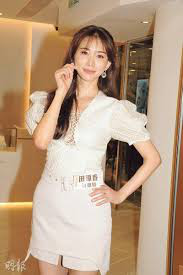

In [56]:
from PIL import Image
imgsrc = os.listdir('chilin/')[7]
im = Image.open('chilin/'+imgsrc)
im

In [57]:
! wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2020-05-11 07:32:51--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.1s    

2020-05-11 07:32:52 (7.14 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]



In [58]:
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
img = cv.imread('chilin/'+imgsrc)
img.shape

(275, 183, 3)

In [0]:
faces = face_cascade.detectMultiScale(img, 1.3, 5)

In [60]:
faces

array([[67, 35, 50, 50]], dtype=int32)

In [0]:
x,y,w,h = faces[0]

In [0]:
box = (x, y, x+w, y+h)

In [0]:
crpim = im.crop(box).resize((32,32))

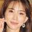

In [64]:
crpim

In [0]:
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

def cropIdolFace(src, dest):
    if not os.path.exists(dest):
        os.mkdir(dest)
    for filename in os.listdir(src):
        img = cv.imread(src + filename)
        faces = face_cascade.detectMultiScale(img, 1.3, 5)
        if len(faces) == 1:
            im      = Image.open(src + filename)
            x,y,w,h = faces[0]
            box     = (x, y, x+w, y+h)
            crpim   = im.crop(box).resize((32,32))
            crpim.save(dest + filename)

In [0]:
cropIdolFace('clock/', 'clock_face/')

In [0]:
cropIdolFace('pig/', 'pig_face/')

In [0]:
cropIdolFace('chilin/', 'chilin_face/')

In [0]:
! zip -r chilin_face chilin_face/*

### 使用 CNN 建立人臉識別模型

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf

In [0]:
# Initialising the CNN
classifier = tf.keras.Sequential()

# Convolution
classifier.add(tf.keras.layers.Conv2D(filters=32, 
                                      kernel_size=(3, 3), 
                                      padding = 'same',
                                      input_shape = (32, 32, 3), 
                                      activation = 'relu'))
# Max Pooling
classifier.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

# Convolution
classifier.add(tf.keras.layers.Conv2D(filters=32, 
                                      kernel_size=(3, 3), 
                                      padding = 'same', 
                                      activation = 'relu'))
# Max Pooling
classifier.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(tf.keras.layers.Flatten())

# Fully Connected
classifier.add(tf.keras.layers.Dense(units = 128, activation = 'relu')) 
classifier.add(tf.keras.layers.Dropout(rate=0.1)) 
classifier.add(tf.keras.layers.Dense(units = 128, activation = 'relu')) 
classifier.add(tf.keras.layers.Dropout(rate=0.1)) 
classifier.add(tf.keras.layers.Dense(units = 3, activation = 'softmax'))

In [73]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               262272    
_________________________________________________________________
dropout (Dropout)            (None, 128)              

In [0]:
classifier.compile(optimizer = 'adam', 
                        loss ='categorical_crossentropy', 
                     metrics = ['accuracy'])

### 圖像增廣技術

In [0]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,     #x坐标保持不变，而对应的y坐标按比例发生平移
                                   zoom_range = 0.2,      #可以让图片在长或宽的方向进行放大
                                   horizontal_flip = True #水平翻转操作
                                  )

In [0]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

### 將資料分為訓練與測試資料集

In [0]:
import os
if not os.path.exists('train/'):
    os.mkdir('train/')
if not os.path.exists('test/'):
    os.mkdir('test/')

In [0]:
import os
from sklearn.model_selection import train_test_split

def splitDataset(dirs):
    dataset = list(os.listdir(dirs))
    train_data, test_data = train_test_split(dataset, test_size= 0.2, random_state = 42)
    
    if not os.path.exists('train/'+dirs):
        os.mkdir('train/'+dirs)
    if not os.path.exists('test/'+dirs):
        os.mkdir('test/'+dirs)

    for f in train_data:
        os.rename(dirs + f, 'train/'+ dirs + f)
    for f in test_data:
        os.rename(dirs + f, 'test/' + dirs +f)

In [0]:
splitDataset('clock_face/')

In [0]:
splitDataset('chilin_face/')

In [0]:
splitDataset('pig_face/')

In [82]:
training_set = train_datagen.flow_from_directory(
    'train/', target_size = (32, 32),
     batch_size = 32,
     class_mode = 'categorical')

Found 527 images belonging to 3 classes.


In [83]:
test_set = test_datagen.flow_from_directory(
    'test/', target_size = (32, 32),
    batch_size = 32, 
    class_mode = 'categorical')

Found 133 images belonging to 3 classes.


In [84]:
history = classifier.fit_generator(training_set,
                         epochs=10,
                         validation_steps=16,
                         verbose = 1,
                         validation_data = test_set)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
   4080/Unknown - 84s 21ms/step - loss: 0.1172 - accuracy: 0.9531

KeyboardInterrupt: ignored

In [0]:
import requests
res = requests.get('https://s.yimg.com/ny/api/res/1.2/H2BVaJZYEhynGFsnaAGvsA--~A/YXBwaWQ9aGlnaGxhbmRlcjtzbT0xO3c9ODAw/https://media-mbst-pub-ue1.s3.amazonaws.com/creatr-uploaded-images/2020-02/59059660-55c8-11ea-bd5e-1aa7b8599e22')
with open('test_clock.jpg', 'wb') as f:
  f.write(res.content)

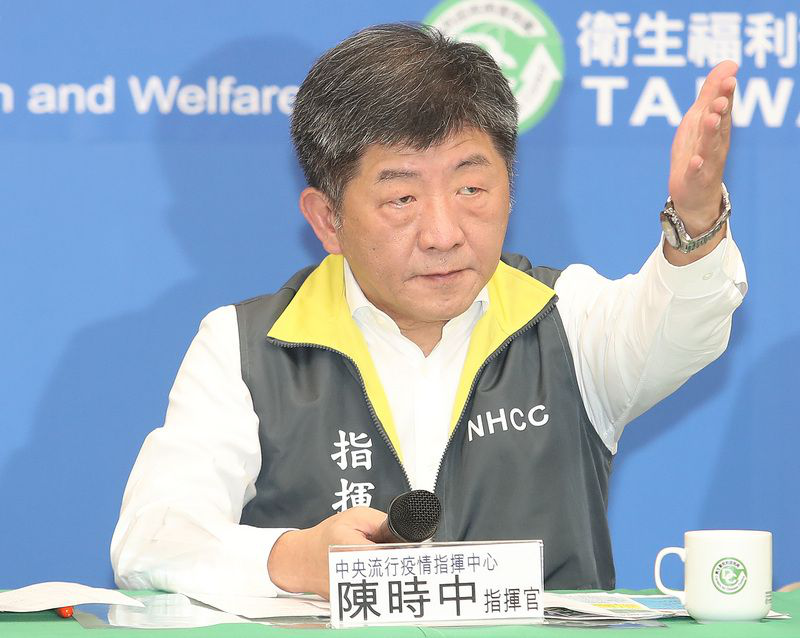

In [86]:
from PIL import Image
Image.open('test_clock.jpg')

In [0]:
img = cv.imread('test_clock.jpg')

In [93]:
faces = face_cascade.detectMultiScale(img, 1.2, 3)
faces

array([[341, 131, 188, 188]], dtype=int32)

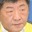

In [94]:
from PIL import Image
im = Image.open('test_clock.jpg')
x,y,w,h = faces[0]
box     = (x, y, x+w, y+h)
crpim   = im.crop(box).resize((32,32))
crpim

In [0]:
crpim.save('predict_face.jpg')

In [97]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('predict_face.jpg', target_size= (32,32))
test_image = image.img_to_array(test_image)
test_image.shape

(32, 32, 3)

In [98]:
test_image = np.expand_dims(test_image, axis = 0)
test_image.shape

(1, 32, 32, 3)

In [99]:
classifier.predict_classes(test_image)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([1])

In [100]:
training_set.class_indices

{'chilin_face': 0, 'clock_face': 1, 'pig_face': 2}

## Yolo

In [101]:
! nvidia-smi

Mon May 11 08:36:47 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    33W / 250W |    948MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

### 複製 darknet

In [102]:
! git clone https://github.com/pjreddie/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 5904, done.
remote: Total 5904 (delta 0), reused 0 (delta 0), pack-reused 5904
Receiving objects: 100% (5904/5904), 6.17 MiB | 4.89 MiB/s, done.
Resolving deltas: 100% (3922/3922), done.


In [103]:
! cd darknet; head Makefile

GPU=0
CUDNN=0
OPENCV=0
OPENMP=0
DEBUG=0

ARCH= -gencode arch=compute_30,code=sm_30 \
      -gencode arch=compute_35,code=sm_35 \
      -gencode arch=compute_50,code=[sm_50,compute_50] \
      -gencode arch=compute_52,code=[sm_52,compute_52]


In [0]:
!sed -i "s/GPU=0/GPU=1/g" darknet/Makefile
!sed -i "s/CUDNN=0/CUDNN=1/g" darknet/Makefile
!sed -i "s/OPENCV=0/OPENCV=1/g" darknet/Makefile

In [105]:
! head darknet/Makefile

GPU=1
CUDNN=1
OPENCV=1
OPENMP=0
DEBUG=0

ARCH= -gencode arch=compute_30,code=sm_30 \
      -gencode arch=compute_35,code=sm_35 \
      -gencode arch=compute_50,code=[sm_50,compute_50] \
      -gencode arch=compute_52,code=[sm_52,compute_52]


### 編譯 YOLO

In [0]:
! cd darknet; make

### 圖片辨識

In [107]:
! cd darknet ; ./darknet

usage: ./darknet <function>


In [109]:
!wget https://pjreddie.com/media/files/yolov3-tiny.weights

--2020-05-11 08:43:09--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M   127KB/s    in 3m 37s  

2020-05-11 08:46:48 (159 KB/s) - ‘yolov3-tiny.weights’ saved [35434956/35434956]



In [0]:
! mv yolov3-tiny.weights "/content/drive/My Drive/aidataset/weights/"

In [0]:
! cp "/content/drive/My Drive/aidataset/weights/yolov3-tiny.weights" ./

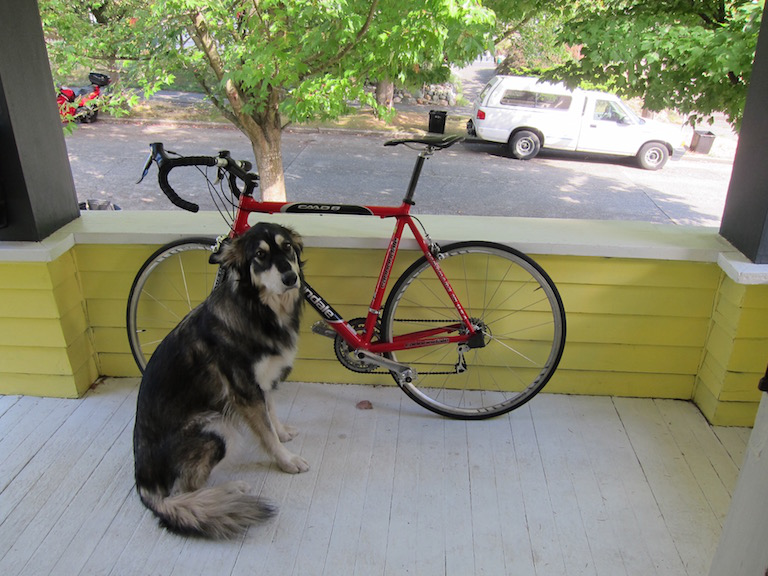

In [112]:
from PIL import Image
Image.open('darknet/data/dog.jpg')

In [113]:
! cd darknet; ./darknet detect cfg/yolov3-tiny.cfg ../yolov3-tiny.weights data/dog.jpg

layer     filters    size              input                output
    0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16  0.150 BFLOPs
    1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16
    2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32  0.399 BFLOPs
    3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32
    4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64  0.399 BFLOPs
    5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64
    6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128  0.399 BFLOPs
    7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128
    8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256  0.399 BFLOPs
    9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256
   10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512  0.399 BFLOPs
   11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512
   12 con

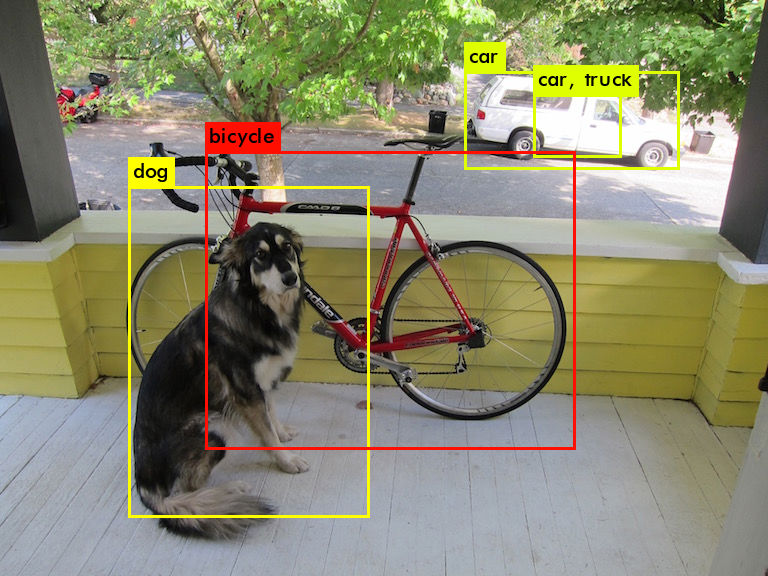

In [114]:

from PIL import Image
Image.open('darknet/predictions.jpg')

In [120]:
! wget https://appledaily-hk-appledaily-prod.cdn.arcpublishing.com/resizer/Qi-DXa58dkLli9bYPa6etAunYSo=/760x427/arc-photo-appledaily.s3.amazonaws.com/ap-ne-1-prod/public/B6S2GJV6KK7E74OU6CH7252YBU.jpg

--2020-05-11 08:57:23--  https://appledaily-hk-appledaily-prod.cdn.arcpublishing.com/resizer/Qi-DXa58dkLli9bYPa6etAunYSo=/760x427/arc-photo-appledaily.s3.amazonaws.com/ap-ne-1-prod/public/B6S2GJV6KK7E74OU6CH7252YBU.jpg
Resolving appledaily-hk-appledaily-prod.cdn.arcpublishing.com (appledaily-hk-appledaily-prod.cdn.arcpublishing.com)... 23.210.215.139, 23.210.215.115
Connecting to appledaily-hk-appledaily-prod.cdn.arcpublishing.com (appledaily-hk-appledaily-prod.cdn.arcpublishing.com)|23.210.215.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65198 (64K) [image/jpeg]
Saving to: ‘B6S2GJV6KK7E74OU6CH7252YBU.jpg’

B6S2GJV6KK7E74OU6CH 100%[===================>]  63.67K  --.-KB/s    in 0.008s  

2020-05-11 08:57:23 (8.27 MB/s) - ‘B6S2GJV6KK7E74OU6CH7252YBU.jpg’ saved [65198/65198]



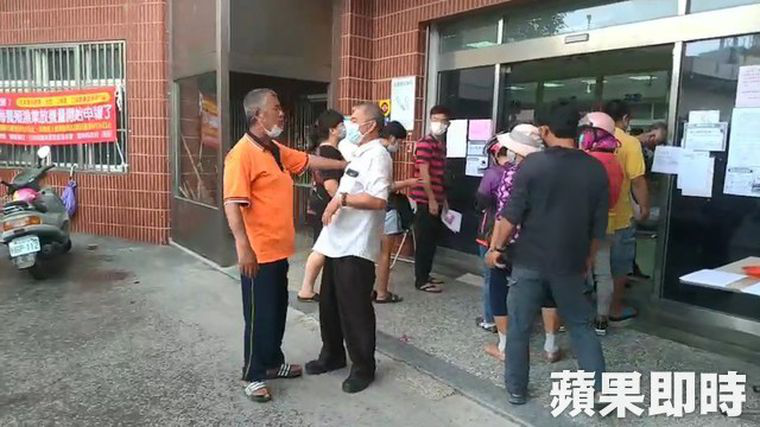

In [121]:
from PIL import Image
Image.open('B6S2GJV6KK7E74OU6CH7252YBU.jpg')

In [122]:
! cd darknet; ./darknet detect cfg/yolov3-tiny.cfg ../yolov3-tiny.weights ../B6S2GJV6KK7E74OU6CH7252YBU.jpg

layer     filters    size              input                output
    0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16  0.150 BFLOPs
    1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16
    2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32  0.399 BFLOPs
    3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32
    4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64  0.399 BFLOPs
    5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64
    6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128  0.399 BFLOPs
    7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128
    8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256  0.399 BFLOPs
    9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256
   10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512  0.399 BFLOPs
   11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512
   12 con

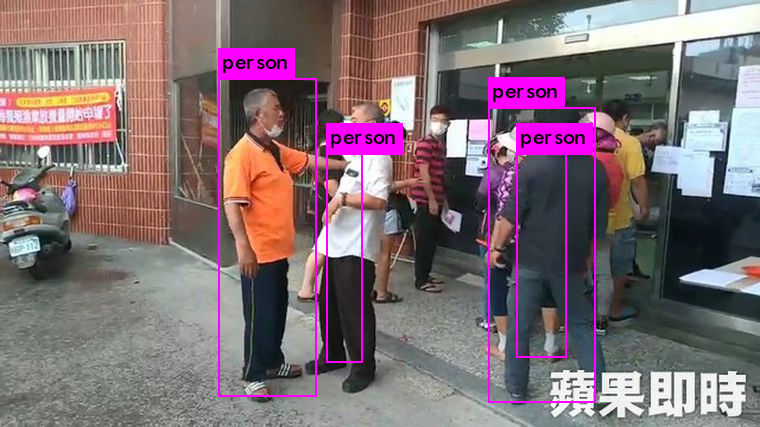

In [123]:

from PIL import Image
Image.open('darknet/predictions.jpg')

## 檢視訓練資料集¶
https://www.kaggle.com/vtech6/medical-masks-dataset/data

## 如何訓練Yolo 模型
- https://github.com/ywchiu/largitdata/blob/master/code/Course_127.ipynb

## 如何接合yolo 與 攝影機
- https://github.com/ywchiu/largitdata/blob/master/code/Course_128.ipynb